In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



In [2]:

# Twitter API Keys
access_token  = 'access_tok'
access_token_secret  = 'access_sec'
consumer_key= 'con_key'
consumer_secret= 'con_sec'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:

# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN",
                "@Foxnews", "@newyorktimes110")


# Array to hold sentiment
sentiment_array = []

# Variable for holding the oldest tweet
oldest_tweet = ""
i=0
sentiments=[]
counter=1


In [4]:
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    
    i+=1
    # Run search around each tweet
    print("Retrieving data for %s" % target)
    public_tweets = api.user_timeline(target, count=100)
    #print(public_tweets)
    # Loop through all tweets
    for tweet in public_tweets:
        text=tweet["text"]
        #print(tweet)
      # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        # Add each value to the appropriate array
        sentiments.append({"User": target,
                           "text":text,
                       "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg,
                       "Tweets Ago": counter})
    counter+=1

    
   

Retrieving data for @BBC
Retrieving data for @CBS
Retrieving data for @CNN
Retrieving data for @Foxnews
Retrieving data for @newyorktimes110


In [5]:
sentiments_pd=pd.DataFrame(sentiments)
sentiments_pd.to_csv("Output/Sentiments.csv")


@BBC
@CBS
@CNN
@Foxnews
@newyorktimes110


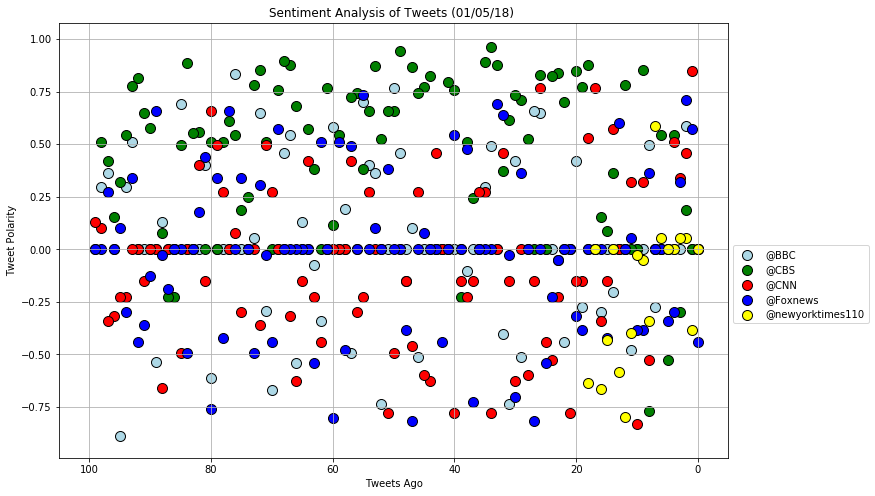

In [9]:
colors = ["lightblue",'green',"red","blue","yellow"]
user=sentiments_pd["User"].unique()
#print(user)
i=0
plt.figure(figsize=(12,8))
for channel in target_terms:
    
    print(channel)
    tweet_ago = np.arange(len(sentiments_pd[sentiments_pd['User']==channel]['Compound']))
    plt.scatter(tweet_ago, sentiments_pd[sentiments_pd['User']==channel]['Compound'],  marker ='o', color=colors[i], s=100,edgecolor="black", label = channel)
    i+=1
plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.legend(loc = 'best',bbox_to_anchor=(1, 0.5), frameon=True)
plt.savefig("Output/Sentiment")
plt.grid(True)
#plt.legend(target_terms,loc="best")
plt.show()



# # Incorporate the other graph properties


##### It can be seen from the plot above that CBS news are positive in nature. 

In [7]:
sent_table = sentiments_pd.pivot_table(index='User',  values="Compound", aggfunc=np.mean)
sent_table

,Compound
User,
@BBC,0.034554
@CBS,0.421913
@CNN,-0.051930
@Foxnews,-0.012462
@newyorktimes110,-0.187968


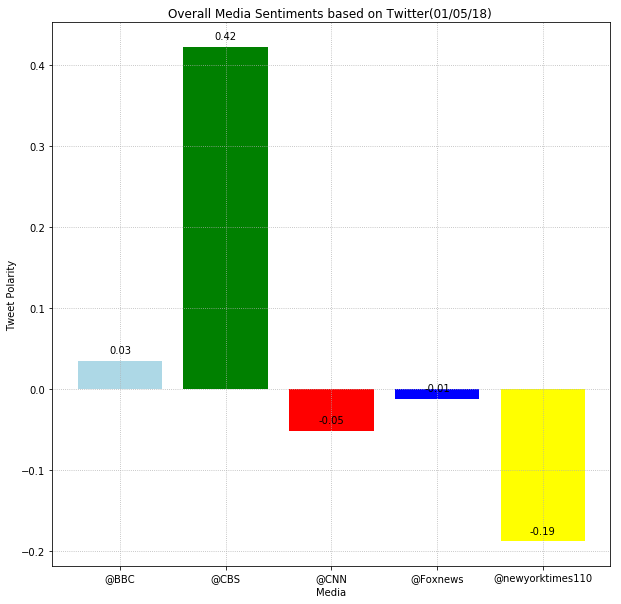

In [8]:
x_axis = np.arange(len(sent_table.index.values))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10,10))
plt.xticks(tick_locations, sent_table.index.values, rotation="horizontal")
#colors = ["blue",'green',"red","black","yellow"]
rect=plt.bar(sent_table.index.values, sent_table["Compound"], color=colors, alpha=1, align="edge")
plt.grid()
#plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.title("Overall Media Sentiments based on Twitter(%s) " % (time.strftime("%x")))
plt.xlabel("Media")
plt.ylabel("Tweet Polarity")
ax.grid(linestyle="dotted")

def autolabel(rects, ax):
    j=0
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                str(round(sent_table.values[j][0],2)),
                ha='center', va='bottom')
        j+=1
autolabel(rect,ax)
plt.savefig("Output/Overall")
plt.show()





### Observations
<ol>
    <li>CBS tweets are positive in nature
    <li>BBC tweets ar slightly positive 
    <li>CNN and Foxnews are  negative 
    <li>New York Times tweets are highly negative 
</ol>